** LSTM-Based Stock Price Prediction and Trading System**

Ankit Kumar Singh (24M1080)

In [ ]:
from matplotlib import pyplot as plt        # Importing from matplotlib to make histogram plots
import numpy as np                          # Importing Numpy mainly for arrays in this assignment
import cv2                                  # Importing CV2 to use openCV
from google.colab.patches import cv2_imshow # Importing cv2_imshow to show the image
import os
import random
import pandas as pd
import seaborn as sns; sns.set()

# Importing the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from keras.metrics import Sum
import glob
from keras.optimizers import Adam

In [ ]:
from google.colab import drive                            # Mounting the drive to load the dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Storing the data into a data structure

dataset = '/content/drive/MyDrive/Assignment1_AML/Stocks.zip'
amzn = '/content/drive/MyDrive/Assignment1_AML/AMZN_1min.txt'
ben = '/content/drive/MyDrive/Assignment1_AML/BEN_1min.txt'
big = '/content/drive/MyDrive/Assignment1_AML/BIG_1min.txt'
cat = '/content/drive/MyDrive/Assignment1_AML/CAT_1min.txt'
chd = '/content/drive/MyDrive/Assignment1_AML/CHD_1min.txt'
dell = '/content/drive/MyDrive/Assignment1_AML/DELL_1min.txt'
acv = '/content/drive/MyDrive/Assignment1_AML/ACV_1min.txt'
aso = '/content/drive/MyDrive/Assignment1_AML/ASO_1min.txt'

I will show the results of 2 stocks one is ACV which has less data and another is AMZN which has around 20 times more data than ACV

In [ ]:
# !unzip '/content/drive/MyDrive/Assignment1_AML/Stocks.zip'
# Reference : https://stackoverflow.com/questions/60157315/uploading-stock-price-data-in-txt-files-and-analyzing-in-python
# complete_data = pd.read_csv(amzn, sep=",",  names=['Date and Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
data = pd.read_csv(acv, sep=",",  names=['Date and Time', 'Open', 'High', 'Low', 'Close', 'Volume'])    # Converting the data to a CSV Format
data2 = pd.read_csv(amzn, sep=",",  names=['Date and Time', 'Open', 'High', 'Low', 'Close', 'Volume'])    # Converting the data to a CSV Format

# complete_df = pd.DataFrame(complete_data)
df = pd.DataFrame(data)                                           # Converting the CSV to DataFrame
df2 = pd.DataFrame(data2)                                           # Converting the CSV to DataFrame

print(df)                                                         # Showing the obtained Data
print(df2)                                                         # Showing the obtained Data

              Date and Time     Open     High      Low    Close  Volume
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360
...                     ...      ...      ...      ...      ...     ...
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0

[117269 rows x 6 columns]
               Date and Time     Open     High      Low    Close  Volume
0        2005-01-03 08:00:00    44.5

In [ ]:
# Converting all the columns as float

df["Close"] = df["Close"].astype(float)
df["Open"] = df["Open"].astype(float)
df["High"] = df["High"].astype(float)
df["Low"] = df["Low"].astype(float)
df["Volume"] = df["Volume"].astype(float)

In [ ]:
# Converting all the columns as float

df2["Close"] = df2["Close"].astype(float)
df2["Open"] = df2["Open"].astype(float)
df2["High"] = df2["High"].astype(float)
df2["Low"] = df2["Low"].astype(float)
df2["Volume"] = df2["Volume"].astype(float)

Que 1A. Plot the minute-by-minute closing price series of few stocks

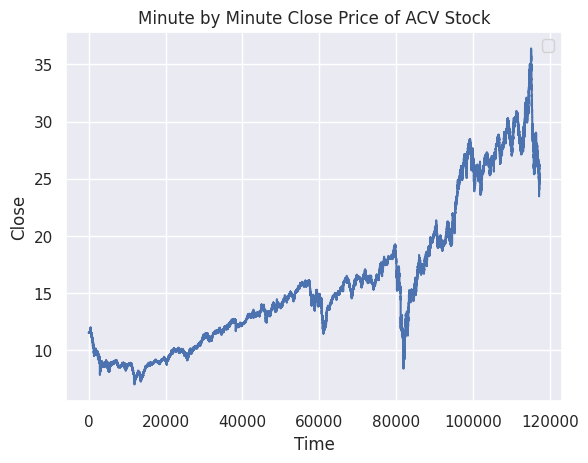

In [ ]:
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Minute by Minute Close Price of ACV Stock')
plt.legend()
plt.show()

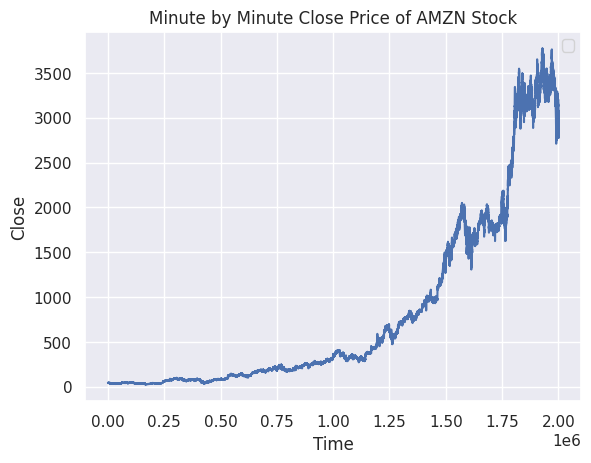

In [ ]:
# AMZN STOCK
plt.plot(df2['Close'])
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Minute by Minute Close Price of AMZN Stock')
plt.legend()
plt.show()

Que 1B. Plot the day-by-day closing price series of a few stocks

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Referred ChatGPT on how to convert Date and Time data format to only data and then plot according to changing dates

# Converting the 'DateTime' column to datetime format for both the stocks
df['DateTime'] = pd.to_datetime(df['Date and Time'])
df2['DateTime'] = pd.to_datetime(df2['Date and Time'])

# Extract the date and time from the 'DateTime' column and create a new column 'Date' and 'Time'
df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

df2['Date'] = df2['DateTime'].dt.date
df2['Time'] = df2['DateTime'].dt.time

# Group the data by 'Date' and calculate the mean of the 'Close' prices for each day
Daily_data = data.groupby('Date')['Close'].mean().reset_index()
Daily_data2 = data2.groupby('Date')['Close'].mean().reset_index()

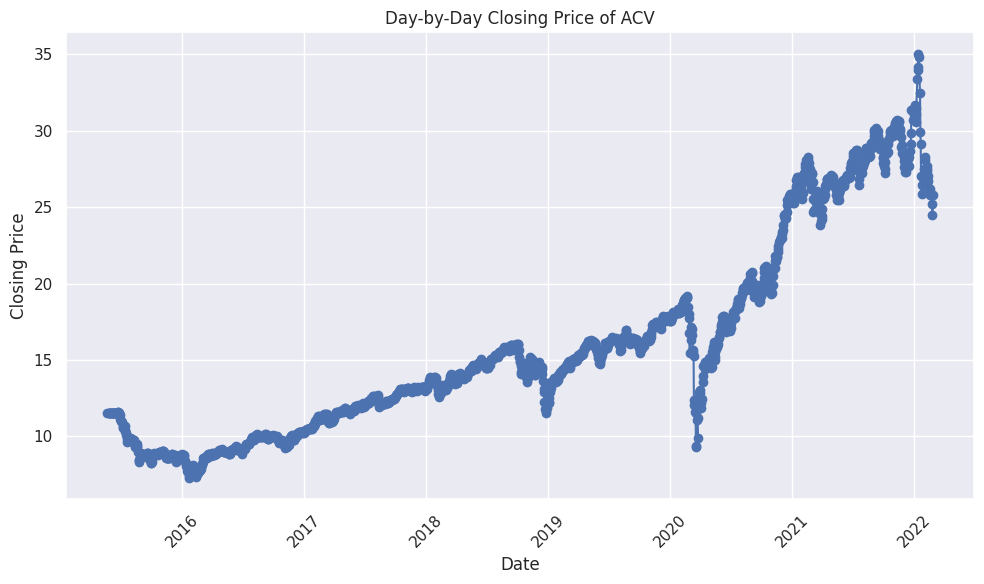

In [ ]:
# Generating the plot
plt.figure(figsize=(10, 6))
plt.plot(Daily_data['Date'], Daily_data['Close'], marker='o', linestyle='-')
plt.title('Day-by-Day Closing Price of ACV')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

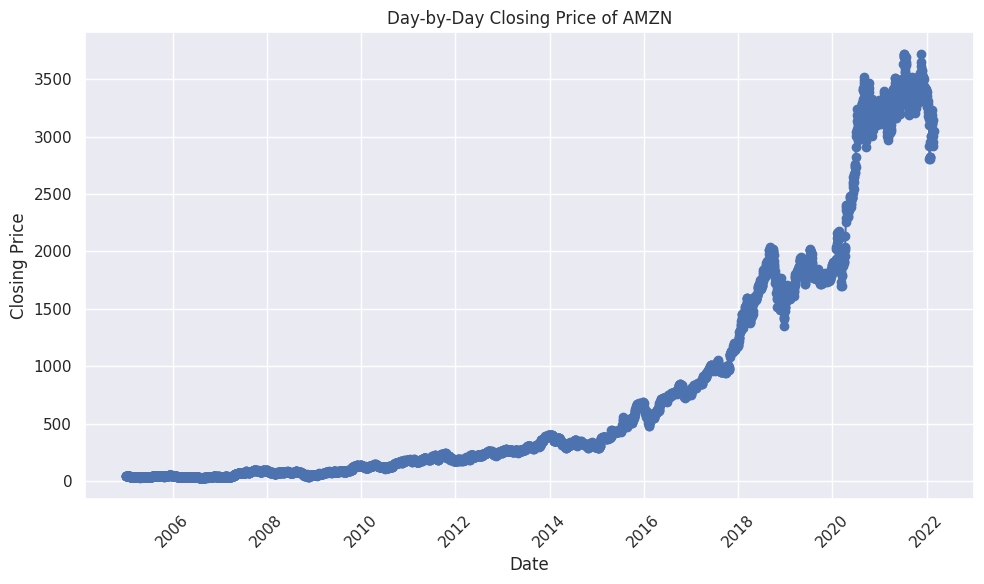

In [ ]:
# Generating the Plot
plt.figure(figsize=(10, 6))
plt.plot(Daily_data2['Date'], Daily_data2['Close'], marker='o', linestyle='-')
plt.title('Day-by-Day Closing Price of AMZN')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

Que 1C. Plot a complete candlestick chart with volume on secondary y-axis for a few stocks with a time period of your choice

In [ ]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


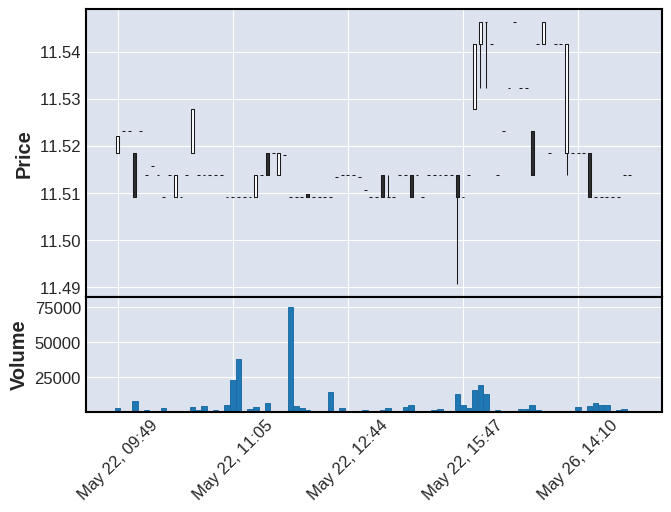

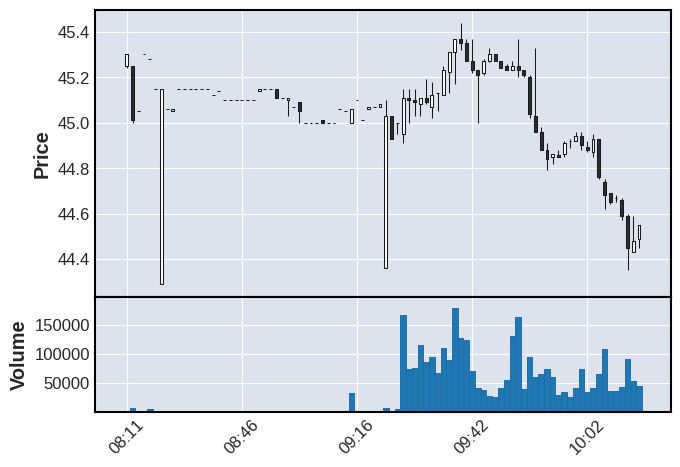

In [ ]:
import mplfinance as mpf

# Create the candlestick chart
# Referred Tejaswee Sulekh for this
new_df = df.set_index('DateTime')
mpf.plot(new_df[10:100], type = 'candle', volume = True)

new_df2 = df2.set_index('DateTime')
mpf.plot(new_df2[10:100], type = 'candle', volume = True)

Que 1D. Note down your observations, e.g. are there any data issues, unexpected jumps, unexpected missing data etc.

There are some dates missing in the data also some minutes are also missing

In [ ]:
df.isnull().sum()

Date and Time    0
Open             0
High             0
Low              0
Close            0
Volume           0
DateTime         0
Date             0
Time             0
dtype: int64

Que 2. Try at least two ways to normalize the data as stock prices and volumes change over time and are different across companies, and pick one by noting your justification.

Method 1: Min Max Scaling

In [ ]:
import pandas as pd

# Define the range for scaling (e.g., 0 to 1)
min_value = 0
max_value = 1

# Min-Max scaling function
def min_max_scaling(data, min_val, max_val):
    min_data = data.min()                                                                      # Minimum over data
    max_data = data.max()                                                                      # Maximum over data
    scaled_data = min_val + (max_val - min_val) * ((data - min_data) / (max_data - min_data))  # Scaling the data according to min and max values
    return scaled_data                                                                         # Returning the new data

# Apply Min-Max scaling to all the columns
df['Close_Scaled'] = min_max_scaling(df['Close'], min_value, max_value)                        # Adding this new column to original data applicable for all
df['Open_Scaled'] = min_max_scaling(df['Close'], min_value, max_value)
df['Low_Scaled'] = min_max_scaling(df['Low'], min_value, max_value)
df['High_Scaled'] = min_max_scaling(df['High'], min_value, max_value)
df['Volume_Scaled'] = min_max_scaling(df['Volume'], min_value, max_value)

df2['Close_Scaled'] = min_max_scaling(df2['Close'], min_value, max_value)                        # Adding this new column to original data applicable for all
df2['Open_Scaled'] = min_max_scaling(df2['Close'], min_value, max_value)
df2['Low_Scaled'] = min_max_scaling(df2['Low'], min_value, max_value)
df2['High_Scaled'] = min_max_scaling(df2['High'], min_value, max_value)
df2['Volume_Scaled'] = min_max_scaling(df2['Volume'], min_value, max_value)

# Showing the scaled values
print(df)
print(df2)


              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  Open_Scaled

Method 2 : Z-Score Normalization

In [ ]:
import pandas as pd

# Z-score normalization function
def z_score_normalization(data):
    mean = data.mean()                          # Mean of Data
    std_dev = data.std()                        # Standard Deviation of Data
    z_score = (data - mean) / std_dev           # Changing the data according to mean and variance
    return z_score                              # Return the new data

# Apply Z-score normalization to all the columns
df['Close_Normalized'] = z_score_normalization(df['Close'])      # Add the new column to existing data applicable for all
df['Open_Normalized'] = z_score_normalization(df['Open'])
df['High_Normalized'] = z_score_normalization(df['High'])
df['Low_Normalized'] = z_score_normalization(df['Low'])
df['Volume_Normalized'] = z_score_normalization(df['Volume'])

df2['Close_Normalized'] = z_score_normalization(df2['Close'])      # Add the new column to existing data applicable for all
df2['Open_Normalized'] = z_score_normalization(df2['Open'])
df2['High_Normalized'] = z_score_normalization(df2['High'])
df2['Low_Normalized'] = z_score_normalization(df2['Low'])
df2['Volume_Normalized'] = z_score_normalization(df2['Volume'])

# Showing the normalized data
print(df)
print(df2)

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  Open_Scaled

Method 3 : Calculating the percentage change in close values for the other 3 methods I have shown only for 1 stock as this will not be used in future but shown just as methods to explore

In [ ]:
import pandas as pd

# Calculate percentage change
df['Percentage_Change'] = df['Close'].pct_change() * 100

print(df)

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  Open_Scaled

Method 4 : Robust Scaling

In [ ]:
import pandas as pd

# Robust scaling function
def robust_scaling(data):
    median = data.median()                                  # Median of the data
    iqr = data.quantile(0.75) - data.quantile(0.25)         # Taking the middle of sorted data
    scaled_data = (data - median) / iqr                     # Scaling according to median and centre
    return scaled_data                                      # Return new data

# Apply Robust scaling to the 'Close' column
df['Close_Robust_Scaled'] = robust_scaling(df['Close'])     # Add the new column to existing data
print(df)


              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  ...  \
0   

Method 5 : Use Logarithmic values of close price

In [ ]:
import pandas as pd

# Calculate logarithmic returns
df['Log_Returns'] = df['Close'].pct_change().apply(lambda x: np.log(1 + x))
print(df)

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  ...  \
0   

Que 3. Make some scenario decisions:

a) high-frequency trading or intra-day swing, or inter-day trade, or long-term (multi-day or multi-week or multi-month).

b) Assume a buy-ask spread (inversely related to volume and directly related to price) and trade commission based on a quick market research. Your trade will lose the buy-ask spread and commissions every time you trade.

c) Decide if you will trade only one stock, or have a model to trade a basket from a particular industry, or any stock.

Decisions Taken :

a) High Frequency Trading

b) I have taken the market commission into account as 5% on the profit

c) Firstly I will focus on only 1 stock

Que 4. Write a pytorch module for defining an LSTM model. Keep it flexible so that the input dimension, number of units, number of layers can easily be changed.

In [ ]:
# Importing the libraries for LSTM and dataloader

import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()                                             # Initializing block
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)   # Define LSTM
        self.fc = nn.Linear(hidden_size, output_size)                                 # Fully Connected linear layer

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])                        # Take the last time step's output
        return out


input_size = 5                                              # Input dimension is 5
hidden_size = 64                                            # Hidden Size
num_layers = 2                                              # Number of hidden layers
output_size = 1                                              # Predicting a single data point (Close)

model = LSTMModel(input_size, hidden_size, num_layers, output_size)  # Initializing the LSTM Model with these numbers
criterion = nn.MSELoss()                                            # Loss function as MSE loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)          # Optimizer and learning rate

Que 5. Write a flexible dataloader for training the LSTM model, especially if you are high frequency data. The inputs should be open, close, high, low, volume of one or more stocks (e.g. other stocks that can help predict the chosen stock price)


In [ ]:
# Defining a custom data loader for an input dimension of 5
class StockDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data                                                        # Taking data into self so that we don't need to pass this everytime
        self.sequence_length = sequence_length                                  # Taking sequence length into self so that we don't need to pass this everytime

    def __len__(self):
        return len(self.data) - self.sequence_length                            # Returning the length of data

    def __getitem__(self, idx):
        start_idx = idx                                                         # Starting Index
        end_idx = idx + self.sequence_length                                    # Ending index
        sequence = self.data[start_idx:end_idx, :]                              # All 5 features
        target = self.data[end_idx, 0]                                           # Predict the next 'close' price
        return torch.tensor(sequence).float(), torch.tensor(target).float()     # Return in form of tensor and float to be passed to dataloader


In [ ]:
# Modify the StockDataset class to predict 1000 minutes into the future
# Same comments as above just that we are predicting 1000 minutes ahead

class StockDataset2(Dataset):
    def __init__(self, data, sequence_length, prediction_horizon=1000):
        self.data = torch.DoubleTensor(data)  # Convert input data to Double
        self.sequence_length = sequence_length
        self.prediction_horizon = prediction_horizon  # Set prediction horizon (default: 1000)

    def __getitem__(self, idx):
        start_idx = idx
        end_idx = idx + self.sequence_length
        sequence = self.data[start_idx:end_idx, :]
        target = self.data[end_idx + self.prediction_horizon, 0]  # Predict 1000 minutes into the future
        return torch.tensor(sequence), torch.tensor(target)

Que 6. Train or pre-train the model by trying to predict the future price (or change in price, if normalized) and keep the future horizon flexible (e.g., easy to change between one minute or 10 minutes into the future). You can try to predict the opening or closing time. Leave the last two years out for testing.

In [ ]:
sequence_length = 10

train_data = df[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled']].values[0:-(2 * 15000)]  # Input Features to be taken
train_dataset = StockDataset(train_data, sequence_length)                                                              # Forming the datset from train dataframe
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)                                                  # Forming the dataloader from dataset

# Same comments as above
train_data2 = df2[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled']].values[0:-(2 * 300000)]
train_dataset2 = StockDataset(train_data2, sequence_length)
train_loader2 = DataLoader(train_dataset2, batch_size=64, shuffle=True)

In [ ]:
num_epochs = 10                                                                  # Number of epochs
for epoch in range(num_epochs):
    for inputs, targets in train_loader:                                        # Start training on the train dataloader
        inputs = inputs.view(-1, sequence_length, input_size)                   # Convert inputs in form so that it can be passed to LSTM model
        outputs = model(inputs.float())                                         # Take the output from the model
        loss = criterion(outputs, targets.unsqueeze(1))                         # Calculate the loss obtained from the output obtained and actual output
        optimizer.zero_grad()                                                   # Apply optimizer
        loss.backward()                                                         # Propagate the loss backward to train the weights
        optimizer.step()                                                        # Again apply optimizer
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')           # Print the loss

# Save the trained model
torch.save(model.state_dict(), 'stock_prediction_model.pth')                    # Save the model for testing

Epoch [1/10], Loss: 0.0000
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


In [ ]:
# Load the trained model
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.load_state_dict(torch.load('stock_prediction_model.pth'))
model.eval()

# Test the model on the latest data
# Comments as above
test_data = df[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled']].values[-(2 * 15000):]
test_dataset = StockDataset(test_data, sequence_length)
test_loader = DataLoader(test_dataset, batch_size=1)  # Batch size of 1 for sequential prediction

predictions = []                                                                # Prediction array
with torch.no_grad():
    for inputs, targets in test_loader:                                         # Start predicting on test data
        inputs = inputs.view(-1, sequence_length, input_size)
        outputs = model(inputs)
        predictions.append(outputs.item())

# Calculate prediction error
actual_prices = test_data[sequence_length:, 1]  # Actual prices for the test period
prediction_error = actual_prices - predictions
print(prediction_error)


[7.76914940e-05 2.05406310e-04 7.55902945e-04 ... 6.43280268e-03
 6.60190105e-03 6.71908379e-03]


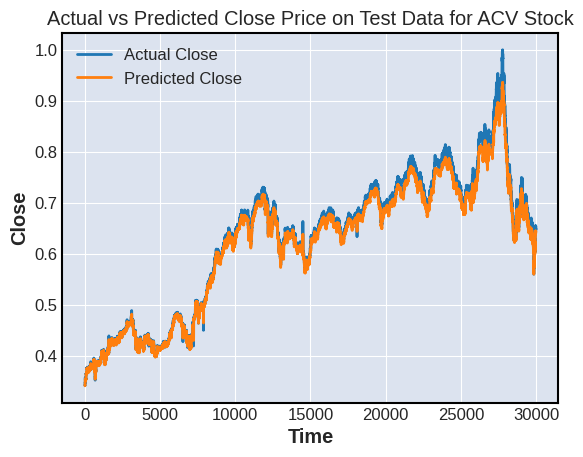

In [ ]:
# Generating the graph

plt.plot(actual_prices, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.title('Actual vs Predicted Close Price on Test Data for ACV Stock')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# Same comments as above
# Since this is a very large dataset number of epochs is kept at 2
num_epochs = 2
for epoch in range(num_epochs):
    for inputs, targets in train_loader2:
        inputs = inputs.view(-1, sequence_length, input_size)
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), 'stock_prediction_model.pth')

Epoch [1/2], Loss: 0.0000
Epoch [2/2], Loss: 0.0000


In [ ]:
# Same comments as above

# Load the trained model
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
model.load_state_dict(torch.load('stock_prediction_model.pth'))
model.eval()

# Test the model on the latest data (last two years for example)
test_data2 = df2[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled']].values[-(2 * 300000):]  # Assuming daily data
test_dataset2 = StockDataset(test_data2, sequence_length)
test_loader2 = DataLoader(test_dataset2, batch_size=1)  # Batch size of 1 for sequential prediction

predictions2 = []
with torch.no_grad():
    for inputs, targets in test_loader2:
        inputs = inputs.view(-1, sequence_length, input_size)
        outputs = model(inputs)
        predictions2.append(outputs.item())

# Calculate prediction error
actual_prices2 = test_data2[sequence_length:, 1]  # Actual prices for the test period
prediction_error2 = actual_prices2 - predictions2
print(prediction_error2)


[0.00021317 0.00030623 0.00024813 ... 0.02233908 0.02290289 0.02191285]


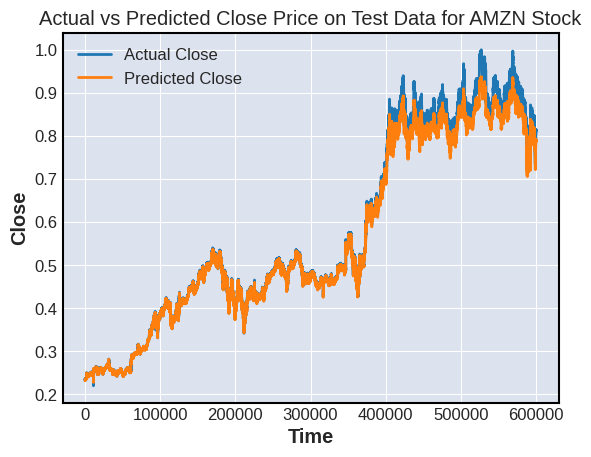

In [ ]:
# Generating the graph

plt.plot(actual_prices2, label='Actual Close')
plt.plot(predictions2, label='Predicted Close')
plt.title('Actual vs Predicted Close Price on Test Data for AMZN Stock')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

PREDICTING FOR 1000 MINUTES AFTER THE TRAINING

All comments will be same as above hence not writing again

In [ ]:
# Test data preparation
test_data = df[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled']].values[-(2 * 15000):]  # Assuming daily data
test_dataset = StockDataset2(test_data, sequence_length)

predictions_new = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.view(-1, sequence_length, input_size)
        outputs = model(inputs)
        predictions_new.append(outputs.item())

# Calculate prediction error 1000 minutes into the future
actual_prices_new = test_data[sequence_length + 1000:, 1]  # Actual 'Close' prices 1000 minutes later
prediction_error_new = actual_prices - predictions_new
print(prediction_error_new)

[7.76914940e-05 2.05406310e-04 7.55902945e-04 ... 6.43280268e-03
 6.60190105e-03 6.71908379e-03]


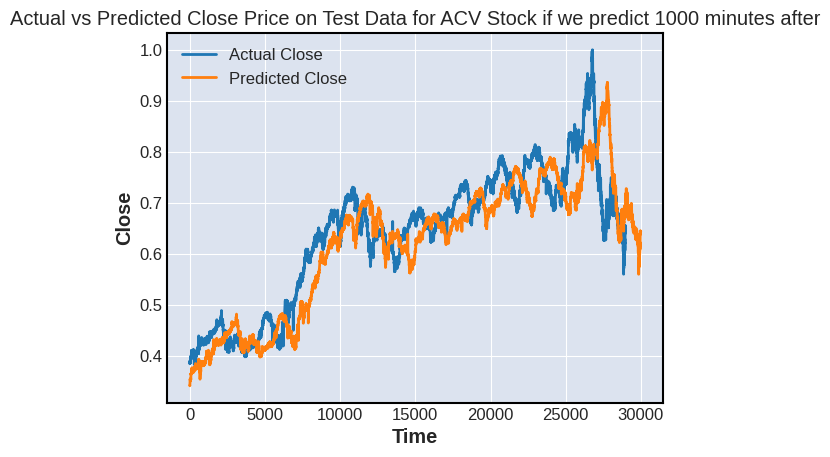

In [ ]:
# Generating the graph

plt.plot(actual_prices_new, label='Actual Close')
plt.plot(predictions_new, label='Predicted Close')
plt.title('Actual vs Predicted Close Price on Test Data for ACV Stock if we predict 1000 minutes after')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# Test data preparation
test_data2 = df2[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled']].values[-(2 * 300000):]  # Assuming daily data
test_dataset2 = StockDataset2(test_data2, sequence_length)

predictions_new2 = []
with torch.no_grad():
    for inputs, targets in test_loader2:
        inputs = inputs.view(-1, sequence_length, input_size)
        outputs = model(inputs)
        predictions_new2.append(outputs.item())

# Calculate prediction error 1000 minutes into the future
actual_prices_new2 = test_data2[sequence_length + 1000:, 1]  # Actual 'Close' prices 1000 minutes later
prediction_error_new2 = actual_prices2 - predictions_new2
print(prediction_error_new2)

[0.00021317 0.00030623 0.00024813 ... 0.02233908 0.02290289 0.02191285]


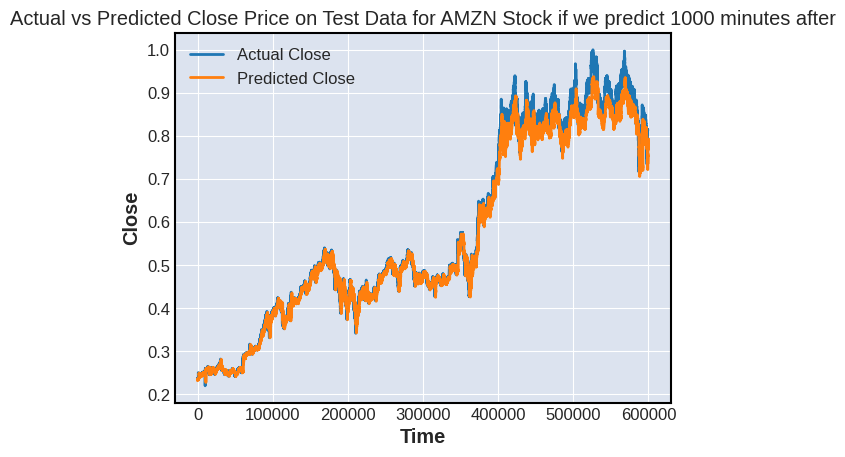

In [ ]:
# Final graph

plt.plot(actual_prices_new2, label='Actual Close')
plt.plot(predictions_new2, label='Predicted Close')
plt.title('Actual vs Predicted Close Price on Test Data for AMZN Stock if we predict 1000 minutes after')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

From both these graphs what we observe is that as we go further away from the last train time the error keeps on increasing.

Que 7. Set up a trading module that will make some hard-coded logical decisions to buy, hold, sell (in any order, because in shorting you can sell first and buy later)

In [ ]:
# Partially referred from Harshwardhan Waghchoure

def tradingModule(prediction, original_price, current_price, cash = 10):
  profit = 0                                                                    # Profit per trade
  total_profit = 0                                                              # Total profit after all trades
  commission = 0.05                                                             # Market commission
  for i in range(len(prediction)):                                              # Minute by minute prediction and trading according to it
    if i == 0:
      last_traded_price = current_price[-1]                                     # Take the previous time price
    else:
      last_traded_price = original_price[i-1]                                   # Depending on i it will change

    if prediction[i] > last_traded_price:                                       # Stock will increase
      quantity = cash // last_traded_price                                      # We will buy as much as we can
      profit = quantity*prediction[i] - quantity*last_traded_price              # Calculate the profit assuming we sell immediately
      cash += profit - commission*profit                                        # Add the profit into cash after paying the commission

    elif prediction[i] < last_traded_price:                                     # Stock will decrease
      quantity = cash // last_traded_price                                      # Quantity that we can trade
      profit = quantity*last_traded_price - quantity*prediction[i]              # Cash the profit that we have generated after shorting
      cash += profit - commission*profit                                        # Add the profit into cash after paying the commission

    else:
      continue                                                                  # If stock price is same do nothing

  print(cash)
  return cash

actual_prices_past = train_data[sequence_length:, 1]                            # Actual prices for the train period
print(tradingModule(predictions, actual_prices, actual_prices_past, 10))


3.792383504043674e+78
3.792383504043674e+78


Convert the prediction prices and current prices into year wise data and then use that to trade for a year for long term trading.

In [ ]:
# Same comments as above
def tradingModule(prediction, original_price, current_price, cash = 10):
  profit = 0
  total_profit = 0
  commission = 0.05
  for i in [0, 9999, 19989]:                                                    # We will do long term trading hence big intervals

    if i == 0:
      last_traded_price = current_price[-1]
    else:
      last_traded_price = original_price[i-9999]

    if cash == 0 or cash < last_traded_price:
      total_profit = total_profit - commission*total_profit
      return total_profit + cash

    elif prediction[i] > last_traded_price:
      quantity = cash // last_traded_price
      profit = quantity*prediction[i] - quantity*last_traded_price
      cash += profit - commission*profit

    elif prediction[i] < last_traded_price:
      quantity = cash // last_traded_price
      profit = quantity*last_traded_price - quantity*prediction[i]
      cash += profit - commission*profit

    else:
      continue

  print(cash)
  return cash

actual_prices_past = train_data[sequence_length:, 1]  # Actual prices for the train period
print(tradingModule(predictions, actual_prices, actual_prices_past, 10))


11.480813266795153
11.480813266795153


We were able to predict correctly for minute by minute that's why we got very high profit however it is a very risky technique since even if 1 prediction goes wrong we lose all money

Que 8. Test the trading system on the latest years on which the model was not trained.

a) Does the price prediction error increase as you go further from the last time on which it was trained?

b) Can you profitably trade with the bid-ask spread and commissions taken into account?

c) How does your profitability compare to a simple buy-and-hold strategy over long term (e.g. one or two years)?

a) Yes, as we go further into the time i.e. if we try to predict 5 minutes, 10 minutes after the trained time the prediction error tends to increse.

b) Yes, I was able to profitably trade using the buy and sell strategy after taking the market commision into the account.

c) If we use a long term strategy to predict after 1 year and using that to trade we will get less profit as compared to the minute by minute profit that we got.

Que 9. Advanced:
a) Can you now modify the model to use multiple stock prices as inputs to predict a single stock (your choice)? Does it improve predictions?

b) Can you add day of the week, day in year, and time as inputs? Does it improve results?

I will combine the 2 stocks that I have shown in this assignment and use that data as input to predict a single stock and then observe

In [ ]:
print(df)
print(df2)

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  Open_Scaled

In [ ]:
# Taking the relevant columns from both stocks in a separate df

ACV_new = df[['Date and Time', 'Open_Scaled', 'Close_Scaled', 'Low_Scaled', 'High_Scaled', 'Volume_Scaled']]
AMZN_new = df2[['Date and Time', 'Open_Scaled', 'Close_Scaled', 'Low_Scaled', 'High_Scaled', 'Volume_Scaled']]

In [ ]:
# Renaming the columns so that which concatenating it will be easier

AMZN_new.rename(columns = {"Close_Scaled": "Close1", "Open_Scaled": "Open1", "High_Scaled": "High1", "Low_Scaled": "Low1", "Volume_Scaled": "Volume1"}, inplace = True)

<ipython-input-94-091fb995b9f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_new.rename(columns = {"Close_Scaled": "Close1", "Open_Scaled": "Open1", "High_Scaled": "High1", "Low_Scaled": "Low1", "Volume_Scaled": "Volume1"}, inplace = True)


In [ ]:
# Set the index for both as date and time for uniformity and easy concatenation

ACV_new.set_index('Date and Time', inplace=True)
AMZN_new.set_index('Date and Time', inplace=True)

In [ ]:
# Check the formed data

print(ACV_new)
print(AMZN_new)

                     Open_Scaled  Close_Scaled  Low_Scaled  High_Scaled  \
Date and Time                                                             
2015-05-22 09:36:00     0.154012      0.154012    0.153856     0.154031   
2015-05-22 09:37:00     0.153856      0.153856    0.153856     0.153715   
2015-05-22 09:38:00     0.153226      0.153226    0.153226     0.153715   
2015-05-22 09:39:00     0.153226      0.153226    0.153226     0.153085   
2015-05-22 09:40:00     0.153226      0.153226    0.153226     0.153085   
...                          ...           ...         ...          ...   
2022-02-25 15:59:00     0.652755      0.652755    0.648592     0.652697   
2022-02-25 16:00:00     0.649351      0.649351    0.649351     0.649293   
2022-02-25 16:10:00     0.649351      0.649351    0.649351     0.649293   
2022-02-25 18:30:00     0.649351      0.649351    0.649351     0.649293   
2022-02-25 19:00:00     0.649351      0.649351    0.649351     0.649293   

                     Vol

In [ ]:
# Since the data was as expected now we can concatenate

new_df = pd.concat([ACV_new, AMZN_new], axis = 1)

In [ ]:
# After concatenation tha data will have those entries as Nan which are present only in 1 stock hence we will remove that

print(new_df)

                     Open_Scaled  Close_Scaled  Low_Scaled  High_Scaled  \
Date and Time                                                             
2015-05-22 09:36:00     0.154012      0.154012    0.153856     0.154031   
2015-05-22 09:37:00     0.153856      0.153856    0.153856     0.153715   
2015-05-22 09:38:00     0.153226      0.153226    0.153226     0.153715   
2015-05-22 09:39:00     0.153226      0.153226    0.153226     0.153085   
2015-05-22 09:40:00     0.153226      0.153226    0.153226     0.153085   
...                          ...           ...         ...          ...   
2022-02-25 17:55:00          NaN           NaN         NaN          NaN   
2022-02-25 18:13:00          NaN           NaN         NaN          NaN   
2022-02-25 18:46:00          NaN           NaN         NaN          NaN   
2022-02-25 19:08:00          NaN           NaN         NaN          NaN   
2022-02-25 19:57:00          NaN           NaN         NaN          NaN   

                     Vol

In [ ]:
# Removing the Nan rows

new_df1 = new_df.dropna()
print(new_df1)

# Now the data is perfect to apply the model

                     Open_Scaled  Close_Scaled  Low_Scaled  High_Scaled  \
Date and Time                                                             
2015-05-22 09:36:00     0.154012      0.154012    0.153856     0.154031   
2015-05-22 09:37:00     0.153856      0.153856    0.153856     0.153715   
2015-05-22 09:38:00     0.153226      0.153226    0.153226     0.153715   
2015-05-22 09:39:00     0.153226      0.153226    0.153226     0.153085   
2015-05-22 09:40:00     0.153226      0.153226    0.153226     0.153085   
...                          ...           ...         ...          ...   
2022-02-25 15:53:00     0.651053      0.651053    0.651053     0.650995   
2022-02-25 15:55:00     0.646404      0.646404    0.646404     0.657122   
2022-02-25 15:59:00     0.652755      0.652755    0.648592     0.652697   
2022-02-25 16:00:00     0.649351      0.649351    0.649351     0.649293   
2022-02-25 16:10:00     0.649351      0.649351    0.649351     0.649293   

                     Vol

In [ ]:
# Apply the model with number of features now as 10 due to 2 stocks
model3 = LSTMModel(10, hidden_size, num_layers, output_size)

In [ ]:
# Same comments as above

sequence_length = 10

train_data = new_df1[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled', 'High1', 'Low1', 'Close1', 'Volume1', 'Open1']].values[0:-(2 * 15000)]  # Replace with your preprocessed data
train_dataset = StockDataset(train_data, sequence_length)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
# Same comments as above

num_epochs = 10
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        inputs = inputs.view(-1, sequence_length, 10)
        outputs = model3(inputs.float())
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model3.state_dict(), 'stock_prediction_model3.pth')

Epoch [1/10], Loss: 0.1556
Epoch [2/10], Loss: 0.1317
Epoch [3/10], Loss: 0.1665
Epoch [4/10], Loss: 0.1394
Epoch [5/10], Loss: 0.1391
Epoch [6/10], Loss: 0.1499
Epoch [7/10], Loss: 0.1348
Epoch [8/10], Loss: 0.1221
Epoch [9/10], Loss: 0.1438
Epoch [10/10], Loss: 0.1089


In [ ]:
# Same comments as above

# Load the trained model
model3 = LSTMModel(10, hidden_size, num_layers, output_size)
model3.load_state_dict(torch.load('stock_prediction_model3.pth'))
model3.eval()

# Test the model on the latest data
test_data = new_df1[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled', 'High1', 'Low1', 'Close1', 'Volume1', 'Open1']].values[0:-(2 * 15000)]  # Assuming daily data
test_dataset = StockDataset(test_data, sequence_length)
test_loader = DataLoader(test_dataset, batch_size=1)  # Batch size of 1 for sequential prediction

predictions = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.view(-1, sequence_length, 10)
        outputs = model3(inputs)
        predictions.append(outputs.item())

# Calculate prediction error
actual_prices = test_data[sequence_length:, 1]  # Actual prices for the test period
prediction_error = actual_prices - predictions
print(prediction_error)

[0.29744502 0.29724259 0.29721937 ... 0.49859734 0.49630937 0.49833404]


We observe that the prediction error has increased this is because 2 stocks can be highly different from each other and they need to be normalized properly which is very difficult in mu=inute by minute analysis as shown here however if we would have taken day by day analysis then we would have observed better results and in general also 2 trends help to train better.

B) Including Date, Time, Day as Inputs

In [ ]:
print(df)  # Observe the df first

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  Open_Scaled

In [ ]:
df['day_of_week'] = df['DateTime'].dt.weekday
df_new = pd.get_dummies(df, columns=['day_of_week'], prefix='day')  # Convert the date and time to day wise data

In [ ]:
print(df_new)       # Observe the new data

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  ...  \
0   

In [ ]:
model2 = LSTMModel(11, hidden_size, num_layers, output_size)   # The number of features now will be 11 due to timestamp and days of the week

In [ ]:
df_new['timestamp'] = pd.to_datetime(df_new['DateTime']).apply(lambda x: x.timestamp())                 # To convert time and date to float we need to convert it to timestamp

In [ ]:
# Change other columns also to float

df_new["timestamp"] = df_new["timestamp"].astype(float)
# df_new["Time"] = df_new["Time"].astype(float)
# df_new["day_0"] = df_new["day_0"].astype(float)
df_new["day_1"] = df_new["day_1"].astype(float)
df_new["day_2"] = df_new["day_2"].astype(float)
df_new["day_3"] = df_new["day_3"].astype(float)
df_new["day_4"] = df_new["day_4"].astype(float)

In [ ]:
print(df_new)            # Observe the new data

              Date and Time     Open     High      Low    Close    Volume  \
0       2015-05-22 09:36:00  11.5323  11.5416  11.5323  11.5369  733715.0   
1       2015-05-22 09:37:00  11.5323  11.5323  11.5323  11.5323   37000.0   
2       2015-05-22 09:38:00  11.5323  11.5323  11.5138  11.5138  153472.0   
3       2015-05-22 09:39:00  11.5138  11.5138  11.5138  11.5138     360.0   
4       2015-05-22 09:40:00  11.5138  11.5138  11.5138  11.5138     360.0   
...                     ...      ...      ...      ...      ...       ...   
117264  2022-02-25 15:59:00  26.0677  26.1900  26.0677  26.1900     554.0   
117265  2022-02-25 16:00:00  26.0900  26.0900  26.0900  26.0900     350.0   
117266  2022-02-25 16:10:00  26.0900  26.0900  26.0900  26.0900       0.0   
117267  2022-02-25 18:30:00  26.0900  26.0900  26.0900  26.0900       0.0   
117268  2022-02-25 19:00:00  26.0900  26.0900  26.0900  26.0900       0.0   

                  DateTime        Date      Time  Close_Scaled  ...  \
0   

In [ ]:
# Comments as above just change the input columns properly

sequence_length = 10

train_data = df_new[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled', 'timestamp', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4']].values[0:-(2 * 15000)]  # Replace with your preprocessed data
train_dataset = StockDataset(train_data, sequence_length)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
# Same comments as above

num_epochs = 10
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        inputs = inputs.view(-1, sequence_length, 11)
        outputs = model2(inputs.float())
        loss = criterion(outputs, targets.unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model2.state_dict(), 'stock_prediction_model.pth')

Epoch [1/10], Loss: 0.1352
Epoch [2/10], Loss: 0.1615
Epoch [3/10], Loss: 0.1772
Epoch [4/10], Loss: 0.1434
Epoch [5/10], Loss: 0.1093
Epoch [6/10], Loss: 0.1158
Epoch [7/10], Loss: 0.1372
Epoch [8/10], Loss: 0.1346
Epoch [9/10], Loss: 0.1381
Epoch [10/10], Loss: 0.1273


In [ ]:
# Same comments as above

# Load the trained model
model2 = LSTMModel(11, hidden_size, num_layers, output_size)
model2.load_state_dict(torch.load('stock_prediction_model.pth'))
model2.eval()

# Test the model on the latest data (last two years for example)
test_data = df_new[['Open_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Volume_Scaled', 'timestamp', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4']].values[0:-(2 * 15000)]  # Assuming daily data
test_dataset = StockDataset(test_data, sequence_length)
test_loader = DataLoader(test_dataset, batch_size=1)  # Batch size of 1 for sequential prediction

predictions = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.view(-1, sequence_length, 11)
        outputs = model2(inputs)
        predictions.append(outputs.item())

# Calculate prediction error
actual_prices = test_data[sequence_length:, 1]  # Actual prices for the test period
prediction_error = actual_prices - predictions
print(prediction_error)

[0.32053197 0.32056601 0.32056601 ... 0.50848232 0.51000716 0.5105143 ]


Here also we observe that the prediction error has increased this is because I have taken minute by minute data into account which is very difficult to convert to day wise encoding however in general this method will help to reduce the prediction error because we will get to know ehich days the trading is happening more and at what time people are more active which help us to trade too.